In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1INdH_7Ul2wp9RqS079wrV_6HkuGKaT3g')

     |████████████████████████████████| 71kB 3.5MB/s 


#NIFTY 50 : ADANI PORTS STOCK PRICE PREDICTION
Final Assignment/Project for "Deep Learning: Zero to GANs" course by Medha Mathur.


In [2]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import numpy as np
import datetime as dt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout

In [5]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
project_name='nifty-50-stock-price-prediction_02'

Dataset taken from :

https://in.finance.yahoo.com/quote/ADANIPORTS.NS/history?period1=1262563200&period2=1609718400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

The .csv file has been imported in the from Google Sheets. 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [ ]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/medhamathur27/nifty-50-stock-price-prediction


'https://jovian.ai/medhamathur27/nifty-50-stock-price-prediction'

In [9]:
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [11]:
worksheet = gc.open('ADANIPORTS.csv').sheet1
rows = worksheet.get_all_values()
dataset_raw = pd.DataFrame(rows[1:],columns=rows[0])
dataset_raw.dropna()
dataset_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,111,112.559998,110.699997,111.349998,102.461502,1079040
1,2010-01-05,111.959999,116.699997,111.800003,115.190002,105.994957,2112500
2,2010-01-06,115.800003,122,113.07,120.900002,111.249168,5761450
3,2010-01-07,121.489998,123.209999,119,119.470001,109.933304,3174260
4,2010-01-08,119.400002,121.699997,118.639999,119.330002,109.804497,1220560


In [12]:
dataset_raw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2717,2020-12-30,484,487.600006,478.149994,485.399994,485.399994,3736356
2718,2020-12-31,485.399994,490.799988,480.25,483.75,483.75,4386328
2719,2021-01-01,485,508,482.549988,503.850006,503.850006,7815730
2720,2021-01-04,507,510.9,495.2,498.9,498.9,9998803
2721,2021-01-05,498.9,504.5,492,500.35,500.35,3521653


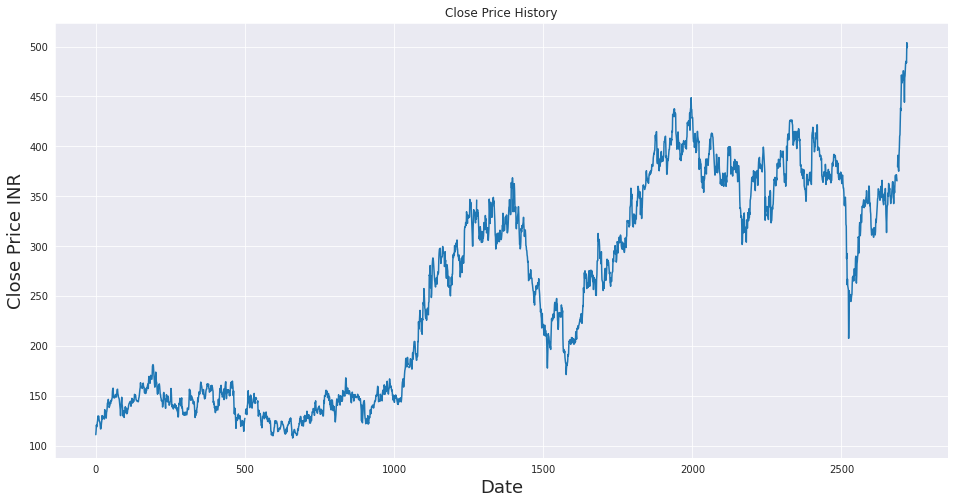

In [13]:
#Visualizing the closing price history for the training dataset
close_price = pd.to_numeric(dataset_raw['Close'], errors='coerce')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(close_price)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()


In [14]:
features = ["Date", "Close"]
dataset = dataset_raw[features]

In [15]:
#setting index
dataset.index = dataset.Date
dataset.drop('Date', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
dataset.head()

,Close
Date,
2010-01-04,111.349998
2010-01-05,115.190002
2010-01-06,120.900002
2010-01-07,119.470001
2010-01-08,119.330002


In [17]:
dataset['Close'] = close_price.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dataset['Close'] = dataset['Close'].fillna(0)
dataset=dataset[dataset['Close'] != 0]

In [20]:
dataset.shape

(2714, 1)

#Preparing the dataset for Training

In [21]:
dataset_final = dataset.values
train_ds = dataset_final[0:1714,:]
valid_ds = dataset_final[1714:,:]

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset_final)

Creating Sliding Window of 90 days

In [23]:
x_train, y_train = [], []
for i in range(90,len(train_ds)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [25]:
assert not np.any(np.isnan(x_train))

Model Building

In [71]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1),activation="relu"))
model.add(Dropout(rate = 0.01))

model.add(LSTM(units=50, return_sequences = True,activation="relu"))
model.add(Dropout(rate = 0.01))

model.add(LSTM(units=50, return_sequences = True,activation="relu"))
model.add(Dropout(rate = 0.01))

model.add(LSTM(units=50, return_sequences = False,activation="relu"))
model.add(Dropout(rate = 0.01))

model.add(Dense(1))

In [72]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
model.fit(x_train, y_train, epochs=25, batch_size=55)

Epoch 1/25
30/30 [==============================] - 10s 191ms/step - loss: 0.0498
Epoch 2/25
30/30 [==============================] - 6s 189ms/step - loss: 0.0039
Epoch 3/25
30/30 [==============================] - 6s 196ms/step - loss: 0.0021
Epoch 4/25
30/30 [==============================] - 6s 193ms/step - loss: 0.0016
Epoch 5/25
30/30 [==============================] - 6s 196ms/step - loss: 0.0015
Epoch 6/25
30/30 [==============================] - 6s 195ms/step - loss: 0.0015
Epoch 7/25
30/30 [==============================] - 6s 195ms/step - loss: 0.0015
Epoch 8/25
30/30 [==============================] - 6s 195ms/step - loss: 0.0014
Epoch 9/25
30/30 [==============================] - 6s 197ms/step - loss: 0.0012
Epoch 10/25
30/30 [==============================] - 6s 199ms/step - loss: 0.0014
Epoch 11/25
30/30 [==============================] - 6s 195ms/step - loss: 0.0014
Epoch 12/25
30/30 [==============================] - 6s 197ms/step - loss: 0.0013
Epoch 13/25
30/30 [=====

In [74]:
model.fit(x_train, y_train, epochs=25, batch_size=55)

Epoch 1/25
30/30 [==============================] - 6s 205ms/step - loss: 8.5662e-04
Epoch 2/25
30/30 [==============================] - 6s 203ms/step - loss: 8.9009e-04
Epoch 3/25
30/30 [==============================] - 6s 202ms/step - loss: 8.0972e-04
Epoch 4/25
30/30 [==============================] - 6s 200ms/step - loss: 9.0764e-04
Epoch 5/25
30/30 [==============================] - 6s 200ms/step - loss: 7.9411e-04
Epoch 6/25
30/30 [==============================] - 6s 203ms/step - loss: 8.7048e-04
Epoch 7/25
30/30 [==============================] - 6s 199ms/step - loss: 8.2653e-04
Epoch 8/25
30/30 [==============================] - 6s 197ms/step - loss: 7.5258e-04
Epoch 9/25
30/30 [==============================] - 6s 198ms/step - loss: 8.3875e-04
Epoch 10/25
30/30 [==============================] - 6s 200ms/step - loss: 7.8317e-04
Epoch 11/25
30/30 [==============================] - 6s 199ms/step - loss: 7.0859e-04
Epoch 12/25
30/30 [==============================] - 6s 198ms/s

In [75]:
model.fit(x_train, y_train, epochs=25, batch_size=55)

Epoch 1/25
30/30 [==============================] - 6s 198ms/step - loss: 6.5756e-04
Epoch 2/25
30/30 [==============================] - 6s 202ms/step - loss: 6.9725e-04
Epoch 3/25
30/30 [==============================] - 6s 203ms/step - loss: 6.5627e-04
Epoch 4/25
30/30 [==============================] - 6s 201ms/step - loss: 6.1923e-04
Epoch 5/25
30/30 [==============================] - 6s 199ms/step - loss: 6.0832e-04
Epoch 6/25
30/30 [==============================] - 6s 202ms/step - loss: 6.4870e-04
Epoch 7/25
30/30 [==============================] - 6s 200ms/step - loss: 5.5259e-04
Epoch 8/25
30/30 [==============================] - 6s 196ms/step - loss: 5.9117e-04
Epoch 9/25
30/30 [==============================] - 6s 198ms/step - loss: 6.2981e-04
Epoch 10/25
30/30 [==============================] - 6s 198ms/step - loss: 6.1401e-04
Epoch 11/25
30/30 [==============================] - 6s 196ms/step - loss: 5.6317e-04
Epoch 12/25
30/30 [==============================] - 6s 196ms/s

In [76]:
model.fit(x_train, y_train, epochs=25, batch_size=64)

Epoch 1/25
26/26 [==============================] - 6s 215ms/step - loss: 4.5152e-04
Epoch 2/25
26/26 [==============================] - 6s 220ms/step - loss: 4.7759e-04
Epoch 3/25
26/26 [==============================] - 6s 217ms/step - loss: 4.5519e-04
Epoch 4/25
26/26 [==============================] - 6s 212ms/step - loss: 4.3107e-04
Epoch 5/25
26/26 [==============================] - 6s 213ms/step - loss: 5.0882e-04
Epoch 6/25
26/26 [==============================] - 6s 212ms/step - loss: 4.8008e-04
Epoch 7/25
26/26 [==============================] - 5s 211ms/step - loss: 4.3836e-04
Epoch 8/25
26/26 [==============================] - 6s 212ms/step - loss: 4.1640e-04
Epoch 9/25
26/26 [==============================] - 6s 212ms/step - loss: 4.5306e-04
Epoch 10/25
26/26 [==============================] - 5s 210ms/step - loss: 4.3015e-04
Epoch 11/25
26/26 [==============================] - 6s 212ms/step - loss: 4.3904e-04
Epoch 12/25
26/26 [==============================] - 6s 212ms/s

In [93]:
#predicting test data values, using past 90 from the train data
inputs = dataset[len(dataset) - len(valid_ds)-90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [32]:
inputs.shape

(1090, 1)

In [78]:
X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

In [42]:
X_test

array([[0.29013516, 0.30289249, 0.31830238, ..., 0.44966527, 0.44423394,
        0.4452444 ],
       [0.30289249, 0.31830238, 0.33510166, ..., 0.44423394, 0.4452444 ,
        0.43513957],
       [0.31830238, 0.33510166, 0.33282809, ..., 0.4452444 , 0.43513957,
        0.42554   ],
       ...,
       [0.60881646, 0.60149047, 0.62207906, ..., 0.94833899, 0.95339141,
        0.94922318],
       [0.60149047, 0.62207906, 0.61273206, ..., 0.95339141, 0.94922318,
        1.        ],
       [0.62207906, 0.61273206, 0.63673105, ..., 0.94922318, 1.        ,
        0.98749525]])

In [35]:
X_test.shape

(1000, 90)

In [79]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
preds = model.predict(X_test)
preds = scaler.inverse_transform(preds)

In [37]:
X_test.shape

(1000, 90, 1)

In [80]:
preds

array([[285.1904 ],
       [283.26886],
       [280.13834],
       [276.4563 ],
       [275.8587 ],
       [270.6267 ],
       [266.94806],
       [264.3106 ],
       [266.87415],
       [269.7667 ],
       [269.1623 ],
       [269.67136],
       [272.88306],
       [275.0535 ],
       [276.0865 ],
       [282.61124],
       [286.38803],
       [286.29724],
       [290.43787],
       [294.2221 ],
       [294.05258],
       [293.9759 ],
       [297.8499 ],
       [296.93378],
       [293.9921 ],
       [294.63705],
       [289.40488],
       [287.44257],
       [291.24585],
       [299.9216 ],
       [303.9911 ],
       [303.33563],
       [296.87277],
       [300.21106],
       [303.22488],
       [303.8107 ],
       [307.01965],
       [305.32825],
       [305.02515],
       [304.88025],
       [308.78796],
       [309.7516 ],
       [307.9344 ],
       [302.6935 ],
       [299.79282],
       [298.59485],
       [300.30298],
       [303.60696],
       [302.6527 ],
       [299.6332 ],


In [81]:
rms=np.sqrt(np.mean(np.power((valid_ds-preds),2)))
rms

9.7364492906962

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


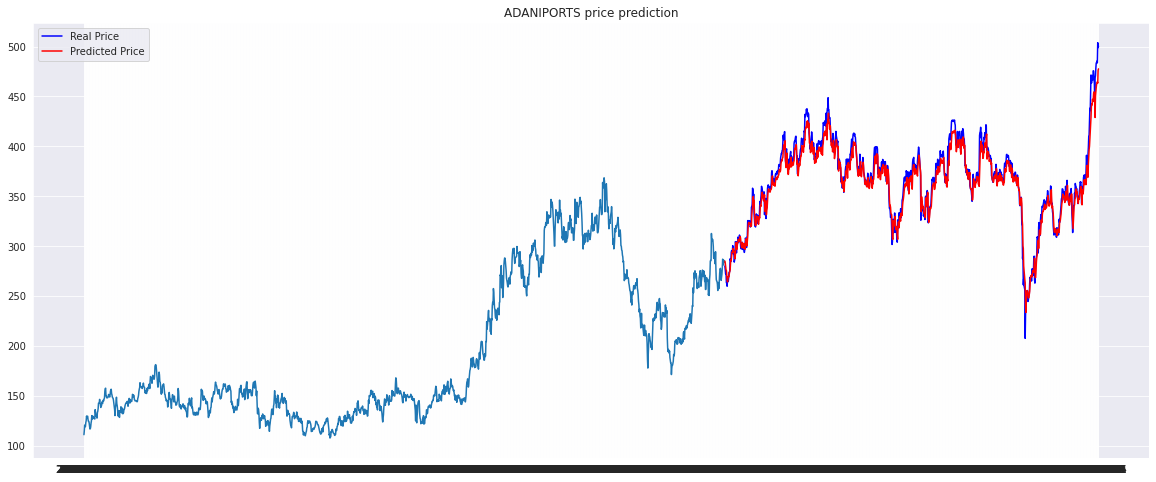

In [114]:
#for plotting
train = dataset[0:1714]
valid = dataset[1714:]
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(train['Close'])
plt.plot(valid['Close'], color = 'blue', label = 'Real Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Price')
plt.title('ADANIPORTS price prediction')
plt.legend()
plt.show()

#Predicting future value of stock

In [110]:
look_back=30
inputs = dataset[-look_back:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [111]:
forecast_list=[]
for _ in range(30):
  x = inputs[-look_back:]
  x = np.reshape(x, (x.shape[1],x.shape[0],1))
  forecast = model.predict(x)
  forecast = scaler.inverse_transform(forecast)
  inputs = scaler.inverse_transform(inputs)
  inputs = np.append(inputs,forecast[0][0])
  inputs = inputs.reshape(-1,1)
  inputs  = scaler.transform(inputs)
  forecast_list.append(forecast[0][0])

In [85]:
last_date = dataset_raw['Date'].values[-1]
prediction_dates = pd.date_range(last_date, periods=31).tolist()
prediction_dates = prediction_dates[1:]
prediction_dates

[Timestamp('2021-01-06 00:00:00', freq='D'),
 Timestamp('2021-01-07 00:00:00', freq='D'),
 Timestamp('2021-01-08 00:00:00', freq='D'),
 Timestamp('2021-01-09 00:00:00', freq='D'),
 Timestamp('2021-01-10 00:00:00', freq='D'),
 Timestamp('2021-01-11 00:00:00', freq='D'),
 Timestamp('2021-01-12 00:00:00', freq='D'),
 Timestamp('2021-01-13 00:00:00', freq='D'),
 Timestamp('2021-01-14 00:00:00', freq='D'),
 Timestamp('2021-01-15 00:00:00', freq='D'),
 Timestamp('2021-01-16 00:00:00', freq='D'),
 Timestamp('2021-01-17 00:00:00', freq='D'),
 Timestamp('2021-01-18 00:00:00', freq='D'),
 Timestamp('2021-01-19 00:00:00', freq='D'),
 Timestamp('2021-01-20 00:00:00', freq='D'),
 Timestamp('2021-01-21 00:00:00', freq='D'),
 Timestamp('2021-01-22 00:00:00', freq='D'),
 Timestamp('2021-01-23 00:00:00', freq='D'),
 Timestamp('2021-01-24 00:00:00', freq='D'),
 Timestamp('2021-01-25 00:00:00', freq='D'),
 Timestamp('2021-01-26 00:00:00', freq='D'),
 Timestamp('2021-01-27 00:00:00', freq='D'),
 Timestamp

In [112]:
fpred=pd.DataFrame(list(zip(prediction_dates, forecast_list)), 
               columns =['Date', 'Predicted Close']) 
fpred

,Date,Predicted Close
0,2021-01-06,476.379822
1,2021-01-07,451.596924
2,2021-01-08,436.330383
3,2021-01-09,432.405914
4,2021-01-10,432.211548
5,2021-01-11,429.697357
6,2021-01-12,424.202087
7,2021-01-13,417.394226
8,2021-01-14,411.091431
9,2021-01-15,406.100220


<Figure size 648x360 with 0 Axes>

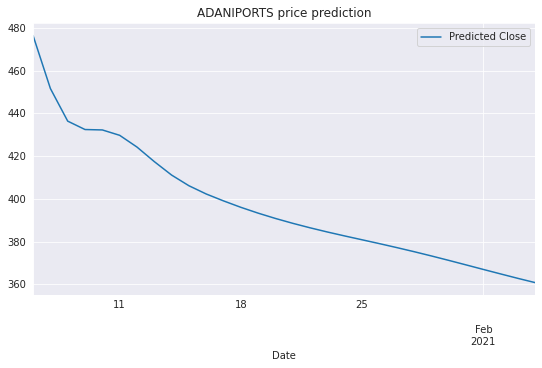

In [113]:
plt.figure(figsize=(9,5))
fpred.plot(x='Date',label = 'Predicted Price')
plt.title('ADANIPORTS price prediction')
plt.legend()
plt.show()

In [115]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/medhamathur27/nifty-50-stock-price-prediction-02


'https://jovian.ai/medhamathur27/nifty-50-stock-price-prediction-02'